In [36]:
import csv
import numpy as np 
import random
import time
# sve_ivp
import os
import pandas as pd
import matplotlib.pyplot as plt
from os.path import dirname, realpath, sep, pardir
import sys
# plt.rcParams.update({'font.size': 12})
# from UPDATE_LM_FNS import calculate_constraints, update_lambda, openfile
# from UPD

In [40]:

# folder_out ='Output_0504/' #    Lambda = old_lambda.copy() + alpha_arr*(Error)/true_constraints
# /home/hodaakl/blue_pdixit/hodaakl/A1MAXENT_EGF/Percentile_Constraints_NonDimerized/output_noise/output_ada_egf_percentile_nf_2_20221013/figs
on_mac = True
on_thinkpad = False 
on_hpg = False
if on_mac == True: 
    data_path = "/Volumes/hodaakl/"
if on_thinkpad== True: 
    data_path = "//exasmb.rc.ufl.edu/blue/pdixit/hodaakl/"
if on_hpg == True: 
    data_path = "/blue/pdixit/hodaakl/"

# specify the project you are working on     
spec_folder = data_path + 'A1MAXENT_EGF/Percentile_Constraints_NonDimerized/'
sys.path.append(data_path + 'src/')
from UPDATE_LM_FNS import calculate_constraints, update_lambda, openfile
from PREDICTION_FUNCTIONS import cell_pred_fn


folder_out = 'output_noise/output_ada_egf_percentile_nf_2_20221013/'


# spec_folder = '/blue/pdixit/hodaakl/A1MAXENT_EGF/Code/Percentile_Constraints/'
# sys.path.append('/blue/pdixit/hodaakl/A1MCMC_SEGFR_AKT/Code/Percentile_Constraints/')




In [41]:
def read_csv( path , index = 0, dat = 'cellpreds' ):    
    df = pd.read_csv(path + f'{dat}_{index}.csv', sep = ',', header = None) 
    table = df.to_numpy()
    return table
    

In [42]:

path = spec_folder + folder_out
err_fn = path +  'Errors.csv'

acc_fn = path + 'Info.csv'
lambda_fn = path + 'Lambdas.csv'
df = pd.read_csv(err_fn, sep = ',', header = None , ) 
err_np = df.to_numpy()
df_l = pd.read_csv(lambda_fn, sep = ',', header = None)
lambda_np = df_l.to_numpy()
latest_iteration = lambda_np.shape[0] -2
print(f'last iteration {latest_iteration}')

rc_m= .1


mean_err = np.mean(abs(err_np), axis = 1)
# mean_err.shape
real_abs = abs(err_np/rc_m)
mean_rel_abs = np.mean(real_abs, axis = 1)
Best_iteration = np.argmin(mean_rel_abs)
print(f'Best iteration {Best_iteration}')


last iteration 191
Best iteration 184


In [ ]:
### FROM THE CELLPREDS FILE , GET MU AND VAR 
#load the cellpreds

In [43]:
# load the best iteration cell preds 
cell_preds_mat = read_csv(path, Best_iteration )
print(f'shape of cell_preds_mat {cell_preds_mat.shape}')
# get mu and var 
nconds = 10
nbins = 9
strtidx = nbins*nconds
mu_mat = cell_preds_mat[:,strtidx:strtidx+nconds]
strtidx += nconds
var_mat = cell_preds_mat[:,strtidx:strtidx+nconds]
print(f'shape of mu_mat {mu_mat.shape}')
print(f'shape of var_mat {var_mat.shape}')


shape of cell_preds_mat (27000, 117)
shape of mu_mat (27000, 10)
shape of var_mat (27000, 10)


In [10]:
(60*7)/10000

0.042

In [11]:

latest_iteration

141

In [22]:
## load the means and the second moments
SF = 0.00122 
path = spec_folder + folder_out
ArraysPath = spec_folder+'ArraysForMaxEnt/'
mu_dat = np.load(f'{spec_folder}ArraysForMaxEnt/EGFR_mean_10Conditions_20201116.npy')/SF
s_dat = np.load(f'{spec_folder}ArraysForMaxEnt/EGFR_2ndMomentMean_10Conditions_20201116.npy')/(SF**2)
ArraysPath = f'{spec_folder}ArraysForMaxEnt/'
# the bin edges boundaries 
BinEdgesDict = np.load(f'{ArraysPath}BinEdges_9bins.npy', allow_pickle= True).item()
# abundance bounds 
AbundBounds = np.load(f'{ArraysPath}segfr_lims_10conds_0304.npy')
LowerLimAbund = AbundBounds[:,0]
UpperLimAbund = AbundBounds[:,1]
# parameter bounds 
LowerLimPars = np.load(f'{ArraysPath}Low_Pars_NoDimerazationModel_0301.npy')
UpperLimPars = np.load(f'{ArraysPath}high_Pars_NoDimerazationModel_0301.npy')
# Ligand concentration array 
Larr = np.load(f'{ArraysPath}EGFR_doses_10Conditions_20201116.npy')

In [23]:
## compare the results 
ax = 0
s_mat = mu_mat**2 - var_mat
mu_sim_pop = np.mean(mu_mat, axis = ax)
s_sim_pop = np.mean(s_mat, axis = ax)
std_sim = np.sqrt(s_sim_pop - mu_sim_pop**2)
std_dat = np.sqrt(s_dat - mu_dat**2)

### Plot Agreement of means , 2nd moments and std

/var/folders/jx/3vq16rcd4yg9qv6dj5sdhd780000gp/T/ipykernel_21930/1706605951.py:1: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(Larr)


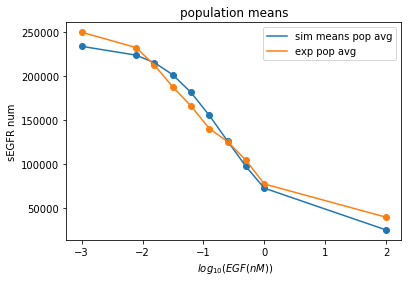

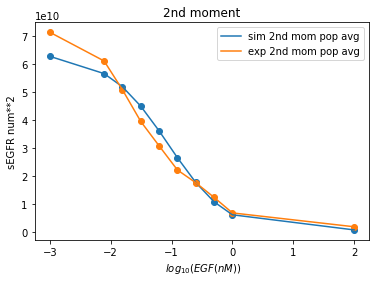

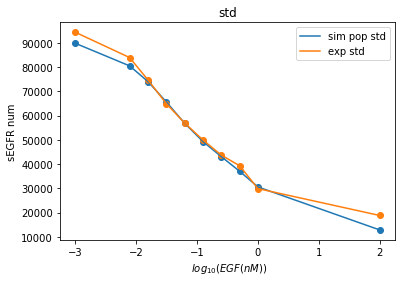

In [24]:
x = np.log10(Larr)
x[0] = -3
plt.plot(x, mu_sim_pop, label = 'sim means pop avg')
plt.scatter(x, mu_sim_pop)
plt.plot(x,mu_dat, label = 'exp pop avg')
plt.scatter(x,mu_dat)


plt.legend()
plt.title('population means')
plt.xlabel(r' $log_{10}(EGF (nM))$')
plt.ylabel(r'sEGFR num')
plt.show()

# x = np.log10(Larr)
# x[0] = -3
plt.plot(x, s_sim_pop, label = 'sim 2nd mom pop avg')
plt.scatter(x, s_sim_pop)
plt.plot(x,s_dat, label = 'exp 2nd mom pop avg')
plt.scatter(x,s_dat)


plt.legend()
plt.title('2nd moment')
plt.xlabel(r' $log_{10}(EGF (nM))$')
plt.ylabel(r'sEGFR num**2')
plt.show()

plt.plot(x, std_sim, label = 'sim pop std')
plt.scatter(x, std_sim)
plt.plot(x,std_dat, label = 'exp std')
plt.scatter(x,std_dat)


plt.legend()
plt.title('std')
plt.xlabel(r' $log_{10}(EGF (nM))$')
plt.ylabel(r'sEGFR num')
plt.show()

In [28]:
x = np.log10(Larr)
x[0] = -3

/var/folders/jx/3vq16rcd4yg9qv6dj5sdhd780000gp/T/ipykernel_21930/1585525017.py:1: RuntimeWarning: divide by zero encountered in log10
  x = np.log10(Larr)


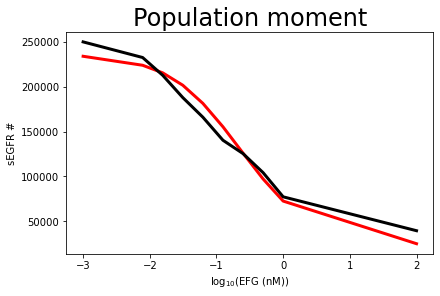

In [29]:

fig, axs = plt.subplots(constrained_layout = True)
plt.rcParams.update({'font.size': 20})

plt.plot(x, mu_sim_pop, linewidth = 3, color = 'r')#, label = 'sim means pop avg')
# plt.scatter(x, mu_sim_pop)
plt.plot(x,mu_dat, linewidth = 3, color = 'k')#, label = 'exp pop avg')
# plt.scatter(x,mu_dat)



# plt.title('Population '+r'$2^{nd}$'+' moment')# + r'$\rangle$')
plt.title('Population moment')#, fontsize = 20)# + r'$\rangle$')

plt.xlabel(r'$\log_{10}$' + '(EFG (nM))')
# plt.ylabel('sEGFR #')# +r' #$^2$')
plt.ylabel('sEGFR' +r' #')



# plt.tight_layout()

fig_directory = '/Users/hodaakl/OneDrive - University of Florida/PhD/Qual_OD/Figures/'

# fname = f'{fig_directory}egf_2ndmomet#.png'

# plt.savefig(fname,      dpi=300, bbox_inches = 'tight')

FileNotFoundError: [Errno 2] No such file or directory: '/Users/hodaakl/OneDrive - University of Florida/PhD/Qual_OD/Figures/egf_2ndmomet#.png'

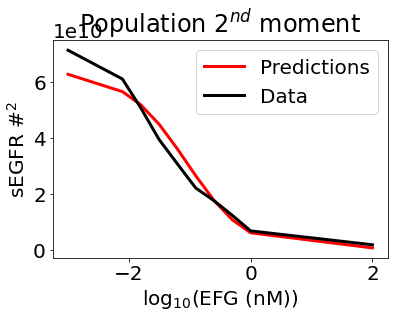

In [30]:


fig, axs = plt.subplots()
plt.rcParams.update({'font.size': 20})

plt.plot(x, s_sim_pop, linewidth = 3, color = 'r', label = 'Predictions')
# plt.scatter(x, mu_sim_pop)
plt.plot(x,s_dat, linewidth = 3, color = 'k', label = 'Data')
# plt.scatter(x,mu_dat)



# plt.title('Population '+r'$2^{nd}$'+' moment')# + r'$\rangle$')
plt.title('Population '+r'$2^{nd}$'+' moment')#, fontsize = 20)# + r'$\rangle$')

plt.xlabel(r'$\log_{10}$' + '(EFG (nM))')
# plt.ylabel('sEGFR #')# +r' #$^2$')
plt.ylabel('sEGFR' +r' #$^2$')

plt.rcParams['axes.titley'] = 1.0    # y is in axes-relative coordinates.
plt.rcParams['axes.titlepad'] = 25  # pad is in points...
plt.legend()
# plt.tight_layout()

fig_directory = '/Users/hodaakl/OneDrive - University of Florida/PhD/Qual_OD/Figures/'

fname = f'{fig_directory}egf_2ndmomet#.png'

plt.savefig(fname,      dpi=300, bbox_inches = 'tight')

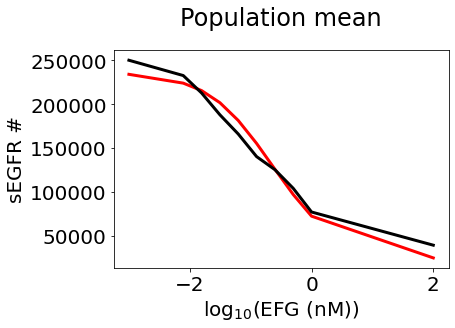

In [31]:



plt.rcParams.update({'font.size': 20})

plt.plot(x, mu_sim_pop, linewidth = 3, color = 'r')#, label = 'sim means pop avg')
# plt.scatter(x, mu_sim_pop)
plt.plot(x,mu_dat, linewidth = 3, color = 'k')#, label = 'exp pop avg')
# plt.scatter(x,mu_dat)



# plt.title('Population '+r'$2^{nd}$'+' moment')# + r'$\rangle$')
plt.title('Population mean')
plt.xlabel(r'$\log_{10}$' + '(EFG (nM))')
plt.ylabel('sEGFR #')# +r' #$^2$')
# plt.ylabel('sEGFR #' +r' #$^2$')





fig_directory = '/Users/hodaakl/OneDrive - University of Florida/PhD/Qual_OD/Figures/'

fname = f'{fig_directory}egf_mean.png'

# plt.savefig(fname,      dpi=300, bbox_inches = 'tight')

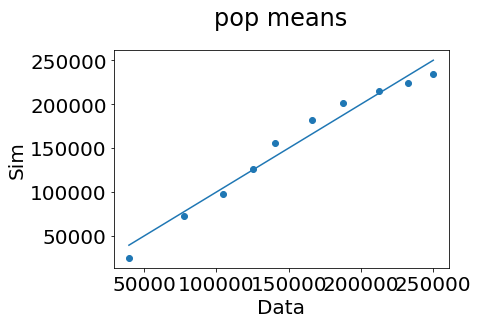

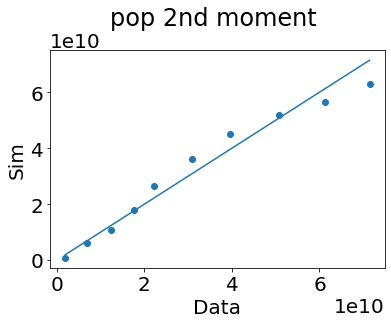

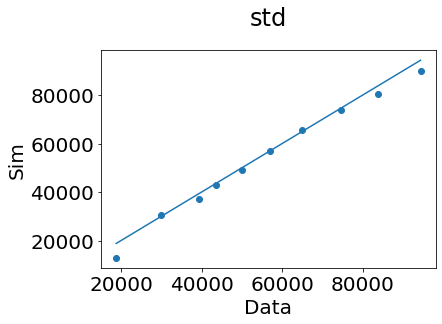

In [32]:
### what about the standard diviation. -- do it soon 
## dat vs sim
plt.scatter(mu_dat, mu_sim_pop)
plt.plot(mu_dat, mu_dat)
plt.title('pop means')
plt.xlabel(r'Data')
plt.ylabel(r'Sim')
plt.show()
plt.scatter(s_dat, s_sim_pop)
plt.plot(s_dat, s_dat)
plt.title('pop 2nd moment ')
plt.xlabel(r'Data')
plt.ylabel(r'Sim')
plt.show()
plt.scatter(std_dat, std_sim)
plt.plot(std_dat, std_dat)
plt.title('std')
plt.xlabel(r'Data')
plt.ylabel(r'Sim')
plt.show()

### Plot agreement of the density plots 

In [25]:
## load the real data 
import scipy.io
from collections import defaultdict
segfr_data = scipy.io.loadmat('/blue/pdixit/hodaakl/Data/SingleCellData/data_segfr_to_upload.mat')
# segfr_data


FileNotFoundError: [Errno 2] No such file or directory: '/blue/pdixit/hodaakl/Data/SingleCellData/data_segfr_to_upload.mat'

In [54]:
# SEGFR_data      = segfr_data['data_segfr'].reshape(10)
# SEGFR_EGF_doses = segfr_data['egf_doses_egfr'].reshape(10)
# SEGFR_EGF_times = np.ones(10)*180
# nL = len(SEGFR_data)
# # AKT_mean = np.zeros((nL,nT))
# SEGFR_mu_1D = np.zeros(nL)
# SEGFR_s_1D = np.zeros(nL)
# ### For each condition characterized by Ligand concentration 
# max_egf = []
# # create a dictionary that has all the data as distributions 
# EGFR_compiled_dict = defaultdict(lambda: 'not present')
# j=0
# for L_idx in range(nL):
# #     nExp = 
#     com_dis = np.array([])
#     nExp = SEGFR_data[L_idx].shape[1]   # number of experiments for each 
#     dist = SEGFR_data[L_idx][0]
#     RunningMean = 0 
#     Running_s_Mean = 0 
#     for E_idx in range(nExp):
#         dis = SEGFR_data[L_idx][0,E_idx]
# #         print(dis.shape)
#         dis = np.reshape(dis, (dis.shape[0],))
#         com_dis= np.concatenate((com_dis, dis), axis = 0)
#         max_egf.append(np.max(dis))
#         RunningMean += np.mean(dis)
#         Running_s_Mean += np.mean(dis**2)
#         SEGFR_mu_1D[L_idx] = RunningMean/nExp
#         SEGFR_s_1D[L_idx] = Running_s_Mean/nExp
#     EGFR_compiled_dict[f'egf_{Larr[L_idx]}_nM'] = com_dis/SF
#     print(com_dis.shape)
        

# #         print('( L =  ' + str(round(AKT_EGF_doses[0,L_idx],3))  + ')  SEGFR_mean = ', str(SEGFR_mu_1D[L_idx]))
        
        
            
# print(np.max(max_egf))

(7210,)
(7763,)
(7622,)
(7322,)
(7890,)
(7717,)
(7033,)
(7281,)
(7134,)
(7698,)
707.347550308


In [26]:
## save that data
fn = f'{ArraysPath}EGFR_data_10cond_scaled_dict.npy'
# np.save(fn, dict(EGFR_compiled_dict))
EGFR_compiled_dict = np.load(fn, allow_pickle=True).item()

In [27]:
# BinEdgesDict is the dictionary that has the bin edges , key is every percentile 
# need to reshape that to define bins for each condition 
# 
nEdges = len(BinEdgesDict) + 2 # the number of edges is 2 + the number of constraints, one edge at each boundary 
nL = len(Larr)
BinsMat = np.zeros((nEdges, nL))
## fill out the edges in between the min and the max
i=1
for key in BinEdgesDict: 
    
    BinsMat[i,:] = BinEdgesDict[key]
    i+=1 
# fill out the min and the the max 
minimum = 10**8
maximum = 0
for key in EGFR_compiled_dict: 
    minimumdis = np.min([np.min(EGFR_compiled_dict[key]), minimum])
    minimum = minimumdis.copy()
    
    maximumdis = np.max([np.max(EGFR_compiled_dict[key]), maximum])
    maximum = maximumdis.copy()
    
print(maximum*SF)
print(minimum*SF)
minimum = 0 
#### 
BinsMat[-1,:] = np.ones(nL)*maximum

707.347550308
-3.8373000021962866e-05


[0.09819695 0.20721221 0.31414702 0.41400832 0.51234397 0.60804438
 0.70055479 0.79348128 0.88918169 1.        ]
[0.09609687 0.2157671  0.31109107 0.41375757 0.5079222  0.60298854
 0.69831251 0.78629396 0.88947572 1.        ]
[0.10312254 0.21293624 0.31815796 0.41288376 0.50839675 0.60718971
 0.69981632 0.78981895 0.88808712 1.        ]
[0.1025676  0.21087135 0.31576072 0.41450423 0.51475007 0.61048894
 0.70144769 0.79541109 0.88869161 1.        ]
[0.10342205 0.20963245 0.31888466 0.41077313 0.50367554 0.60481622
 0.69974651 0.79201521 0.88707224 1.        ]
[0.10276014 0.20590903 0.30257872 0.40520928 0.50511857 0.60619412
 0.69858753 0.79538681 0.89581444 1.        ]
[0.10209015 0.21100526 0.31067823 0.4070809  0.50618513 0.61211432
 0.7041092  0.79653064 0.89051614 1.        ]
[0.11069908 0.20986128 0.31025958 0.41340475 0.5105068  0.61543744
 0.71130339 0.79522044 0.89259717 1.        ]
[0.1065321  0.20213064 0.29674797 0.39444912 0.49439305 0.5862069
 0.68769274 0.79464536 0.89052

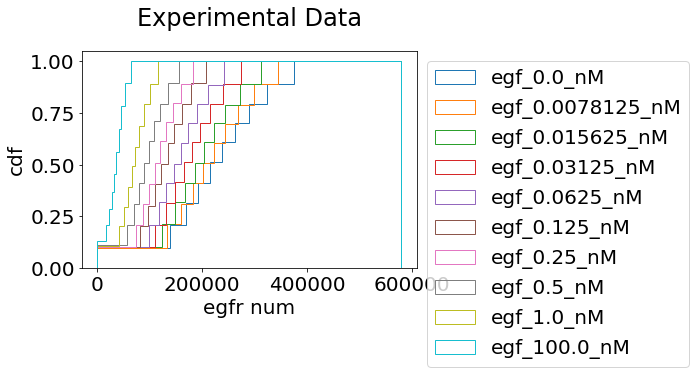

In [33]:
### get the density plots here 
##
Exp_bin_fra = defaultdict(lambda: 'not present')
# need the bin edges dictionary
# define before as BinEdgesDict
i=0
for key in EGFR_compiled_dict:
    # define the edges array 
    dat = EGFR_compiled_dict[key]
    binedges = BinsMat[:,i]
    n, bins, patches = plt.hist(dat,bins=binedges, cumulative = True, density=True, histtype='step', label = f'{key}')
    print(n)
    Exp_bin_fra[key] = n
    i+=1
plt.xlabel('egfr num')
plt.ylabel('cdf')
plt.title('Experimental Data')
plt.legend(bbox_to_anchor = (1,1))
    

In [34]:
cp_np = read_csv( path , index = latest_iteration, dat = 'cellpreds' )
cpmean = np.mean(c, axis =0)
nppc = len(BinEdgesDict)
nConds  = nL
Per_Mat = np.empty((nppc,nConds ))
k=0
for i in range(nppc):
    Per_Mat[i,:] = cpmean[k:k+nConds]
    k+=nConds
cum_mat = np.empty_like(Per_Mat)


for i in range(nppc-1):
    cum_mat[i,:] = np.sum(Per_Mat[0:i+1,:], axis = 0)
    
cum_mat[-1,:]  = np.sum(Per_Mat, axis = 0)

FileNotFoundError: [Errno 2] No such file or directory: '/Volumes/hodaakl/A1MAXENT_EGF/Percentile_Constraints_NonDimerized/Percentile_Constraints_NonDimerized/output_noise/output_ada_egf_percentile_nf_2_20221013/cellpreds_186.csv'

In [72]:
cum_mat[:,-1]

array([0.36316976, 0.55438885, 0.67179846, 0.76331968, 0.84015916,
       0.90149   , 0.95491384, 0.98887597, 0.99971515])

egf_0.0_nM


NameError: name 'cum_mat' is not defined

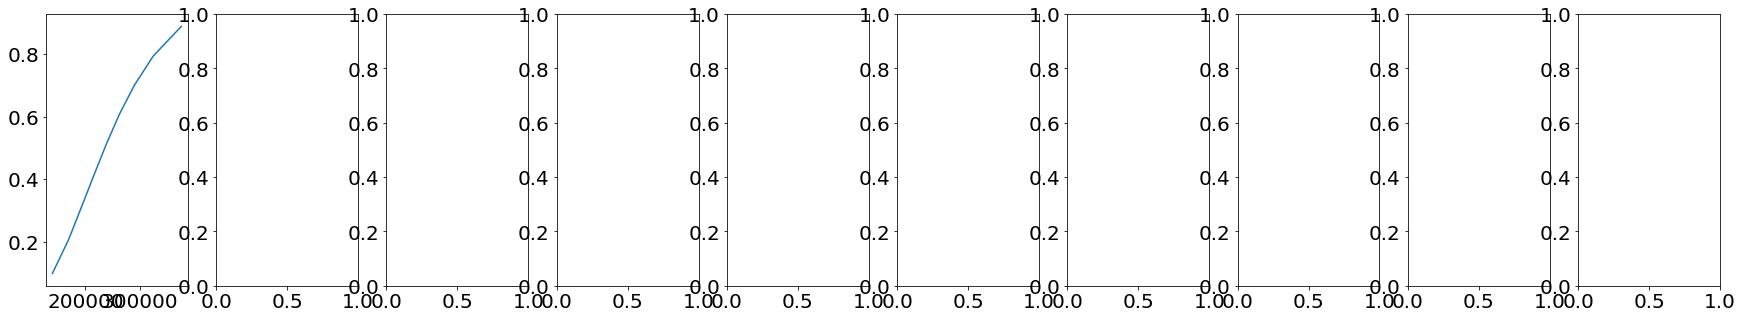

In [35]:
# nR = len(DataDict)
fig, axs = plt.subplots(1,10, figsize = (30,5))
# nT = len(time_values)
nr = 0; nc = 0;
i=0
for key in Exp_bin_fra:
    print(key)
    x = BinsMat[1:-1,i]

    axs[nc].plot(x, Exp_bin_fra[key][:-1], label = 'data')

    axs[nc].plot(x, cum_mat[:,i], label = 'pred')
    

    axs[nc].set_title(f'{key}')
    axs[nc].set_xlabel('nuclear FoxO')
#     axs[nc].set_xlim([0,10**10])
    axs[nc].set_ylabel('cdf')

    # if (nr==0 and nc==0):

    axs[nc].legend()


    i+=1 
    nc+=1 
plt.show()

In [54]:
x

array([139371.79993671, 169301.4613725 , 193450.24978258, 215861.78739549,
       238336.87591748, 262327.48998853, 289714.41364072, 324079.38712263,
       375980.4243087 ])

In [ ]:
x